# Clean Energy Index Analysis

In [123]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [124]:
clean_energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Clean_Energy_Index.csv"
clean_energy= pd.read_csv(clean_energy_url, parse_dates=['Date'])

In [125]:
clean_energy.head()

,Date,Clean_Energy
0,2011-08-31,842.65
1,2011-09-01,824.99
2,2011-09-02,791.99
3,2011-09-05,776.69
4,2011-09-06,755.55


In [126]:
clean_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2616 non-null   datetime64[ns]
 1   Clean_Energy  2616 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.0 KB


In [127]:
# We dont have a null value

# Explatory Data Analysis

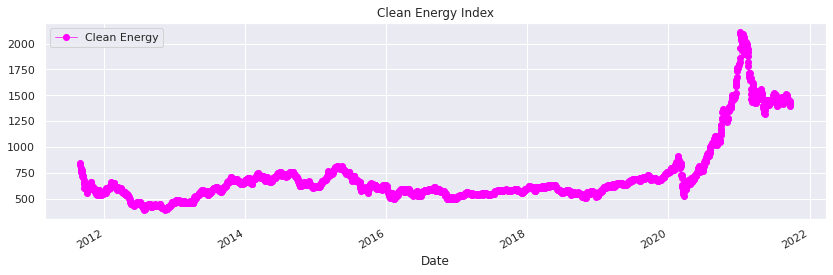

In [128]:
sns.set(rc={'figure.figsize':(14, 4)})

clean_energy_indexed = clean_energy.set_index("Date")

clean_energy_indexed['Clean_Energy'].plot(marker='o', linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index")
plt.legend()

- The demand for clean energy rised after 2020 during the pandemic.
- In 2021 we can see the demand has been stablized but still it is in record high compaired to the previous years.

- Lets do feature engineering for better understanding of the data

In [129]:
def add_features(data):
  data["day_of_month"] = data.Date.dt.day
  data["month"] = data.Date.dt.month
  data["year"] = data.Date.dt.year
  data["day_of_week"] = data.Date.dt.dayofweek

  # make all columns lower_case 
  data.columns = data.columns.str.lower().str.replace(" ", '_')

  return data
clean_energy = add_features(clean_energy)

In [130]:
clean_energy.head()

,date,clean_energy,day_of_month,month,year,day_of_week
0,2011-08-31,842.65,31,8,2011,2
1,2011-09-01,824.99,1,9,2011,3
2,2011-09-02,791.99,2,9,2011,4
3,2011-09-05,776.69,5,9,2011,0
4,2011-09-06,755.55,6,9,2011,1


In [131]:
# Add season
def assign_season(month):

  if month >=1 and month < 3:
    return 'winter'
  elif month >=3 and month < 6:
    return 'spring'
  elif month >= 6 and month < 9:
    return 'summer'
  elif month >= 9 and month < 12:
    return 'Autumn'
  else:
    return 'winter'
clean_energy['season'] = clean_energy['month'].apply(assign_season)

In [132]:
clean_energy.head()

,date,clean_energy,day_of_month,month,year,day_of_week,season
0,2011-08-31,842.65,31,8,2011,2,summer
1,2011-09-01,824.99,1,9,2011,3,Autumn
2,2011-09-02,791.99,2,9,2011,4,Autumn
3,2011-09-05,776.69,5,9,2011,0,Autumn
4,2011-09-06,755.55,6,9,2011,1,Autumn


In [133]:
# Plot clean_energy demand for each independent feature

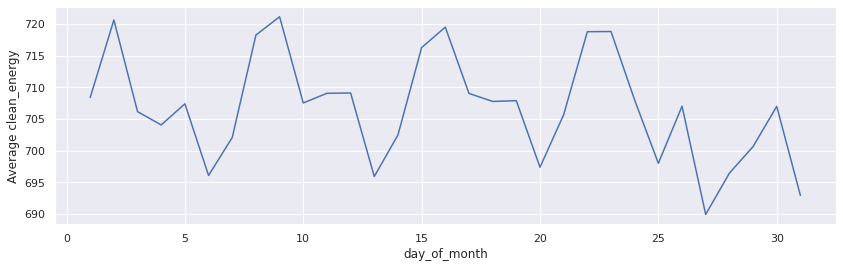

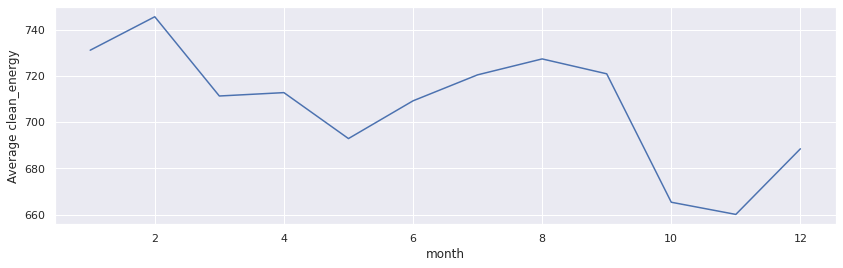

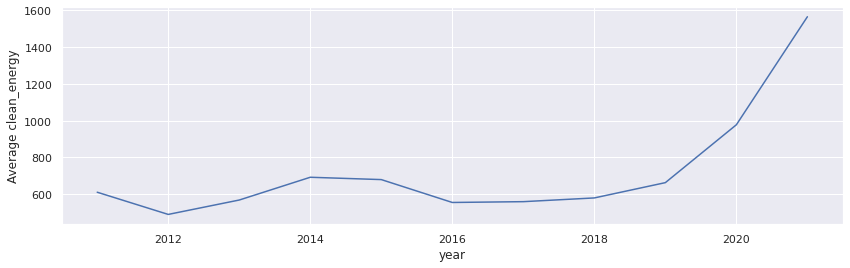

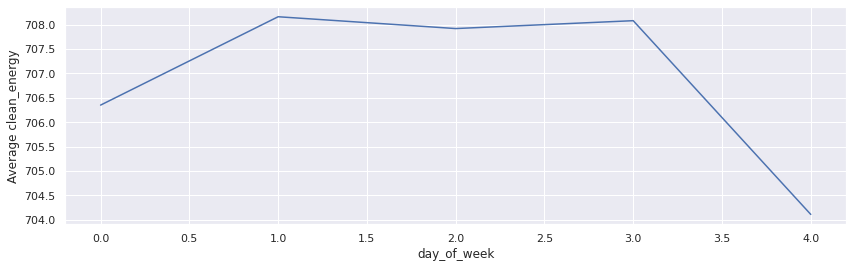

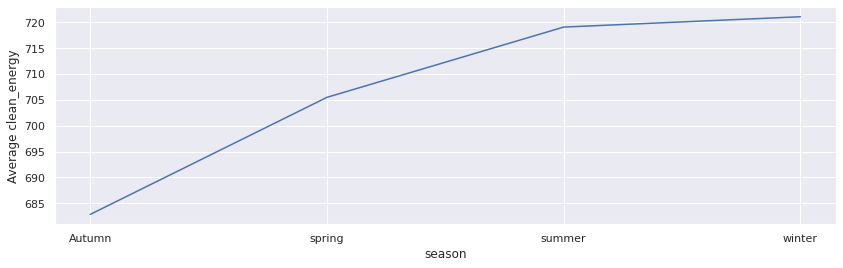

In [134]:
# Average clean_energy 
for c in clean_energy.columns.drop(["clean_energy", "date"]):
  plt.figure()
  data = clean_energy.groupby([c])['clean_energy'].mean()
  plt.plot(data)
  plt.xlabel(c)
  plt.ylabel("Average clean_energy")
  plt.show()

 We learned the following from the average clean_energy demand plot.

Days of the week:
- We dont have data for weekends
- Average sell for tuesday, wednsday and thursday is higher
- Friday has the lowest

Season:
- Summer and winter has higher average clean_energy demand

Year:
- The demand for clean_energy was higher from 2013 to 2015.
- starting from 2019 the demand rises and in 2020 and until now it keeps increasing. the pandemic has a great influence.

Day_of_month:
- This feature doesn't tell much but there seems to be 4 intervals where we can say the 4 weeks in a month.
- The middle of each 4 interaval has increased average clean_energy value which indicated the mid of the week has increased demand. this is what we get from day_of_the week feature.

Month:
- January and February are the peak
- From May to september there is a continuous increase in demand




NOTE: The above remark is based on average clean_energy index and it can be affected highly by an outlier. Lets Plot the box-plot.

In [135]:
# Box plot of each independent variable

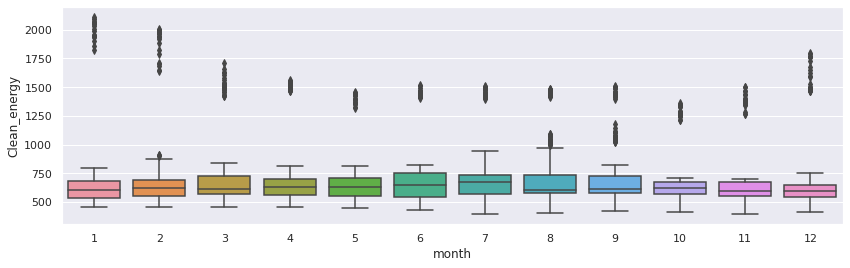

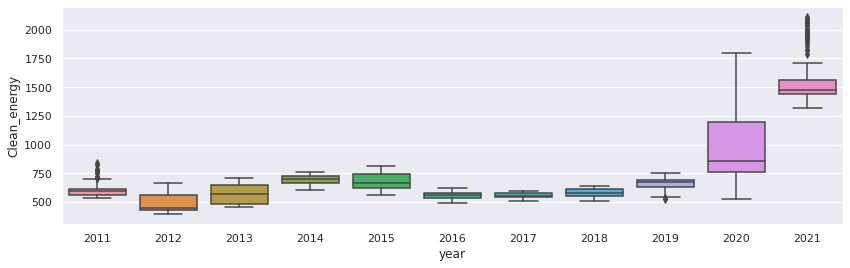

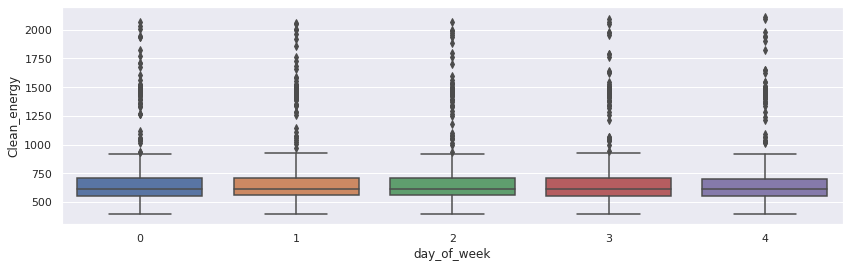

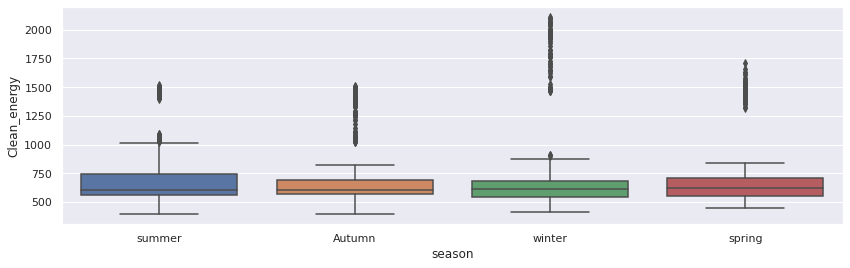

In [136]:
# Average clean_energy 
for c in clean_energy.columns.drop(["clean_energy", "date","day_of_month"]):
  plt.figure()
  sns.boxplot(data=clean_energy, x=c, y='clean_energy')
  plt.xlabel(c)
  plt.ylabel("Clean_energy")
  plt.show()

In [137]:
# drop days_of_month
clean_energy = clean_energy.drop("day_of_month", axis=1)

In [138]:
# visualize the correlation map

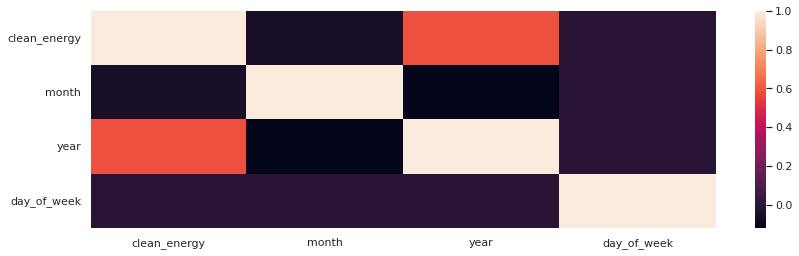

In [139]:
sns.heatmap(clean_energy.corr())
plt.show()

The above heatmap shows year and clean_energy are highly corelated, but there others are not.
The seasonal information we get from the above plots are hidden, lets do one hot encoding for season and do the correlation again.

In [140]:
def feature_encoding(df, catagorical_cols):
  # onehot encode catagorical columns
  df_list=[]
  enc = OneHotEncoder(handle_unknown='ignore')
  for col in catagorical_cols:
    enc_col = df[col].unique()
    enc_data = df[[col]]
    temp_df = pd.DataFrame(enc.fit_transform(enc_data).toarray(), columns=enc_col)
    df_list.append(temp_df)
    df = df.drop([col], axis=1)
  df = pd.concat([df, pd.concat(df_list, axis=1)], axis=1)
  return df

In [141]:
clean_energy = feature_encoding(clean_energy, ["season"])

In [142]:
clean_energy.head()

,date,clean_energy,month,year,day_of_week,summer,Autumn,winter,spring
0,2011-08-31,842.65,8,2011,2,0.0,0.0,1.0,0.0
1,2011-09-01,824.99,9,2011,3,1.0,0.0,0.0,0.0
2,2011-09-02,791.99,9,2011,4,1.0,0.0,0.0,0.0
3,2011-09-05,776.69,9,2011,0,1.0,0.0,0.0,0.0
4,2011-09-06,755.55,9,2011,1,1.0,0.0,0.0,0.0


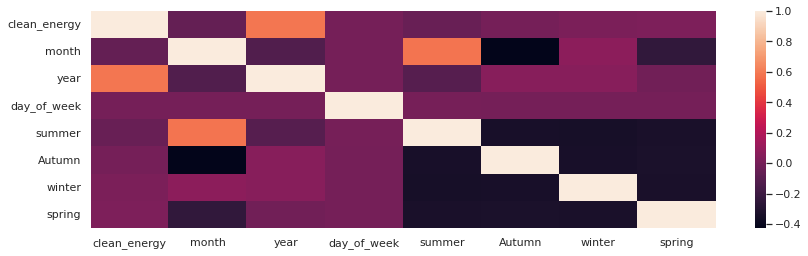

In [143]:
sns.heatmap(clean_energy.corr())
plt.show()

In [144]:
# We now can see a better seasonal correlation than before  
# - Summer and month are highly corelated, which shows there might be redudunt information if both are used
# Lets represent month using sin and cosine

# What is a good way to transform Cyclic Ordinal attributes?

# Reference https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes

In [145]:
def map_month_to_cos_sin(df,month_field=None):
  '''
  map_month_to_cos_sin function

  Inputs:
  df: dataframe of interest
  
  Returns:
  df: return the dataframe (though strictly not neccessary)
  '''
  # convert day of month to sin & cosine
  df[month_field+'_of_cos'] = np.cos(2 * np.pi * df[month_field]/12)
  df[month_field+'_of_sin'] = np.sin(2 * np.pi * df[month_field]/12)

  df = df.drop(month_field, axis=1)

  return df

In [146]:
clean_energy = map_month_to_cos_sin(clean_energy, month_field="month")

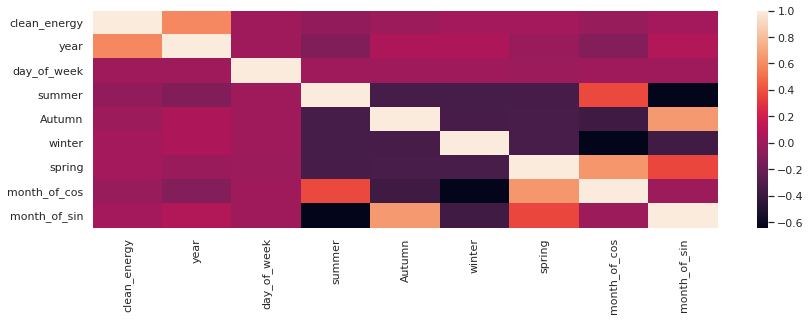

In [147]:
sns.heatmap(clean_energy.corr())
plt.show()

In [148]:
# We still get a higher corelation between month and 4 seasons (thats expected), so lets keep season as it is much explanatory variable and drop month. 

In [149]:
# drop month cos and sin 
clean_energy = clean_energy.drop(["month_of_cos","month_of_sin"], axis=1)

In [150]:
# create a onehot encoding for day_of_week 
clean_energy = feature_encoding(clean_energy, ["day_of_week"])

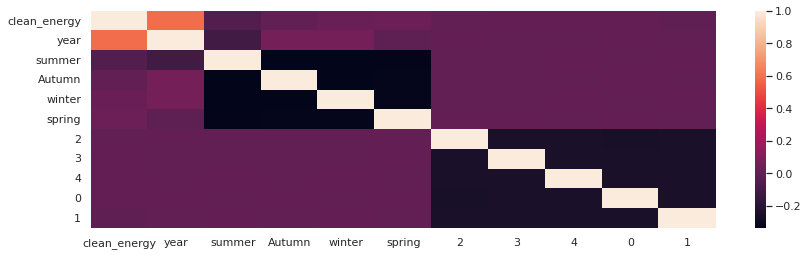

In [151]:
sns.heatmap(clean_energy.corr())
plt.show()

In [152]:
# We now have a better representation,
# - independent variables are less corelated to each other
# - Year, winter and spring has higher correlation to our target variable

In [153]:
# Lets add two more feature regarding 
# 1. the clean_energy_index difference to learn from history. 
clean_energy["clean_energy_diff"] = clean_energy['clean_energy'].diff().shift(1)
clean_energy = clean_energy.dropna()

In [154]:
# 2. add before_covid as a feature  
before_covid = []
for i in clean_energy["year"]:
  if str(i) < '2020':
    before_covid.append(1)
  else:
    before_covid.append(0)
  
clean_energy["before_covid"] = before_covid

In [155]:
clean_energy.head()

,date,clean_energy,year,summer,Autumn,winter,spring,2,3,4,0,1,clean_energy_diff,before_covid
2,2011-09-02,791.99,2011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-17.66,1
3,2011-09-05,776.69,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-33.00,1
4,2011-09-06,755.55,2011,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-15.30,1
5,2011-09-07,773.66,2011,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-21.14,1
6,2011-09-08,759.44,2011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.11,1


In [156]:
clean_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 2 to 2615
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2614 non-null   datetime64[ns]
 1   clean_energy       2614 non-null   float64       
 2   year               2614 non-null   int64         
 3   summer             2614 non-null   float64       
 4   Autumn             2614 non-null   float64       
 5   winter             2614 non-null   float64       
 6   spring             2614 non-null   float64       
 7   2                  2614 non-null   float64       
 8   3                  2614 non-null   float64       
 9   4                  2614 non-null   float64       
 10  0                  2614 non-null   float64       
 11  1                  2614 non-null   float64       
 12  clean_energy_diff  2614 non-null   float64       
 13  before_covid       2614 non-null   int64         
dtypes: datet

In [157]:
clean_energy.corr()['clean_energy'].sort_values(ascending=False)

clean_energy         1.000000
year                 0.592863
clean_energy_diff    0.054570
spring               0.027180
winter               0.023540
3                    0.002237
0                    0.001729
4                    0.001395
2                   -0.000807
Autumn              -0.002575
1                   -0.004561
summer              -0.047601
before_covid        -0.794827
Name: clean_energy, dtype: float64

In [161]:
# Make year a catagorical variable

clean_energy = feature_encoding(clean_energy, ["year"])
clean_energy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 2615
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2614 non-null   datetime64[ns]
 1   clean_energy       2614 non-null   float64       
 2   summer             2614 non-null   float64       
 3   Autumn             2614 non-null   float64       
 4   winter             2614 non-null   float64       
 5   spring             2614 non-null   float64       
 6   2                  2614 non-null   float64       
 7   3                  2614 non-null   float64       
 8   4                  2614 non-null   float64       
 9   0                  2614 non-null   float64       
 10  1                  2614 non-null   float64       
 11  clean_energy_diff  2614 non-null   float64       
 12  before_covid       2614 non-null   float64       
 13  2011               2614 non-null   float64       
 14  2012    

In [162]:
clean_energy = clean_energy.dropna()

In [163]:
clean_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 2 to 2613
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2612 non-null   datetime64[ns]
 1   clean_energy       2612 non-null   float64       
 2   summer             2612 non-null   float64       
 3   Autumn             2612 non-null   float64       
 4   winter             2612 non-null   float64       
 5   spring             2612 non-null   float64       
 6   2                  2612 non-null   float64       
 7   3                  2612 non-null   float64       
 8   4                  2612 non-null   float64       
 9   0                  2612 non-null   float64       
 10  1                  2612 non-null   float64       
 11  clean_energy_diff  2612 non-null   float64       
 12  before_covid       2612 non-null   float64       
 13  2011               2612 non-null   float64       
 14  2012    

In [165]:
clean_energy.head()

,date,clean_energy,summer,Autumn,winter,spring,2,3,4,0,1,clean_energy_diff,before_covid,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,2011-09-02,791.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-17.66,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-09-05,776.69,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-33.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-09-06,755.55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-15.30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2011-09-07,773.66,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-21.14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2011-09-08,759.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.11,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Linear regression model

I will classify the data into before and after the pandemic and take train and test data from two classes.

Since we are working with time series data, we are required to train the data by history and test by latest. But as we clearly see in the above EDA the pandemic has a sudden rise and we wanted our model to also learn from that. 

Training data:
- 70% of the data before covid
- 70% of the data after covid

Test data:
- 30% of the data before covid
- 30% of the data after covid

In [83]:
# def data_split(data):
#   data = data.sort_values('date', ascending=True)
#   data_beforeCovid = data[data['date'] < '2020'].copy()
#   data_afterCovid = data[data['date'] >= '2020'].copy()

#   # Select the first 70% of data_beforeCovid as training set and the remain for test set.
#   before_covid_length = int(len(data_beforeCovid)*0.7)  
#   beforeCovid_train = data_beforeCovid.iloc[0:before_covid_length]
#   beforeCovid_test = data_beforeCovid.iloc[before_covid_length:]

#   # Select the first 70% of data_afterCovid as training set and the remain for test set.
#   after_covid_length = int(len(data_afterCovid)*0.7)
#   afterCovid_train = data_afterCovid.iloc[0:after_covid_length]
#   afterCovid_test = data_afterCovid.iloc[after_covid_length:]

#   train = pd.concat([beforeCovid_train, afterCovid_train],ignore_index=True)
#   train = train.sort_values('date',ascending=True)
#   train = train.set_index('date')

#   test = pd.concat([beforeCovid_test, afterCovid_test], ignore_index=True)
#   test = test.sort_values('date',ascending=True)
#   test = test.set_index('date')

#   # scale clean_energy diff
#   scaler = MinMaxScaler()
#   train["clean_energy_diff"] = scaler.fit_transform(train[["clean_energy_diff"]])
#   test["clean_energy_diff"] = scaler.transform(test[["clean_energy_diff"]])

#   return train, test

# Take all data except september 2021 as training and the remaining as testing 

In [166]:
def train_test_split_fixed(data):
  data = data.sort_values('date', ascending=True)

  train = data[data['date'] < '2021-09-01'].copy()
  test = data[data['date'] >= '2021-09-01'].copy()

  train = train.set_index('date')
  test = test.set_index('date')

  # scale clean_energy diff
  scaler = MinMaxScaler()
  train["clean_energy_diff"] = scaler.fit_transform(train[["clean_energy_diff"]])
  test["clean_energy_diff"] = scaler.transform(test[["clean_energy_diff"]])

  return train, test

In [167]:
clean_energy_train, clean_energy_test = train_test_split_fixed(clean_energy)

In [168]:
# clean_energy_train['year'].value_counts().sort_index().plot.bar()

In [169]:
# clean_energy_test['year'].value_counts().sort_index().plot.bar()

In [170]:
clean_energy_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2011-09-02 to 2021-08-31
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clean_energy       2596 non-null   float64
 1   summer             2596 non-null   float64
 2   Autumn             2596 non-null   float64
 3   winter             2596 non-null   float64
 4   spring             2596 non-null   float64
 5   2                  2596 non-null   float64
 6   3                  2596 non-null   float64
 7   4                  2596 non-null   float64
 8   0                  2596 non-null   float64
 9   1                  2596 non-null   float64
 10  clean_energy_diff  2596 non-null   float64
 11  before_covid       2596 non-null   float64
 12  2011               2596 non-null   float64
 13  2012               2596 non-null   float64
 14  2013               2596 non-null   float64
 15  2014               2596 non-null   float64
 16  2015  

In [171]:
clean_energy_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2021-09-01 to 2021-09-22
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clean_energy       16 non-null     float64
 1   summer             16 non-null     float64
 2   Autumn             16 non-null     float64
 3   winter             16 non-null     float64
 4   spring             16 non-null     float64
 5   2                  16 non-null     float64
 6   3                  16 non-null     float64
 7   4                  16 non-null     float64
 8   0                  16 non-null     float64
 9   1                  16 non-null     float64
 10  clean_energy_diff  16 non-null     float64
 11  before_covid       16 non-null     float64
 12  2011               16 non-null     float64
 13  2012               16 non-null     float64
 14  2013               16 non-null     float64
 15  2014               16 non-null     float64
 16  2015    

In [172]:
# Train LR Model
def train_LinearReg_model(train,test):
  features = train.columns.drop("clean_energy")
  lr = linear_model.LinearRegression()
  lr.fit(train[features], train["clean_energy"])
  predictions = lr.predict(test[features])
  mse = mean_squared_error(test["clean_energy"], predictions)
  rmse = np.sqrt(mse)
  print('LinearRegression Model Rmse ={}'.format(rmse))
  return rmse, predictions

In [179]:
_, pred_result_train = train_LinearReg_model(clean_energy_train, clean_energy_train)

LinearRegression Model Rmse =115.65652904471179


In [180]:
_, pred_result_test = train_LinearReg_model(clean_energy_train, clean_energy_test)

LinearRegression Model Rmse =155.66325638216617


In [176]:
def plotResult(y_test, y_pred, plot_intervals=False, scale=1.036, model_name="LR"):


    """ Plot result predictions with confidence interval"""

    plt.figure(figsize=(15, 7))
    plt.plot(y_test.index, y_pred, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.index, y_test.values, label="actual", linewidth=2.0)
    plt.ylabel('Clean Energy')

    # Plot confidence intervals for smoothed values
    if plot_intervals:
      #scale = 1.036 ## 85%
      error = np.sqrt(mean_squared_error(y_test, y_pred))
      deviation = np.std(y_test - y_pred)
      lower = y_pred - (error + scale * deviation)
      upper = y_pred + (error + scale * deviation)
      
      plt.fill_between(y_test.index, lower, upper, color='grey', alpha=0.4, label="85% upper bond / lower bond")
        
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    plt.title("Predicted vs. Actual clean energy for {} with - RMSE={}".format(model_name, error))
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

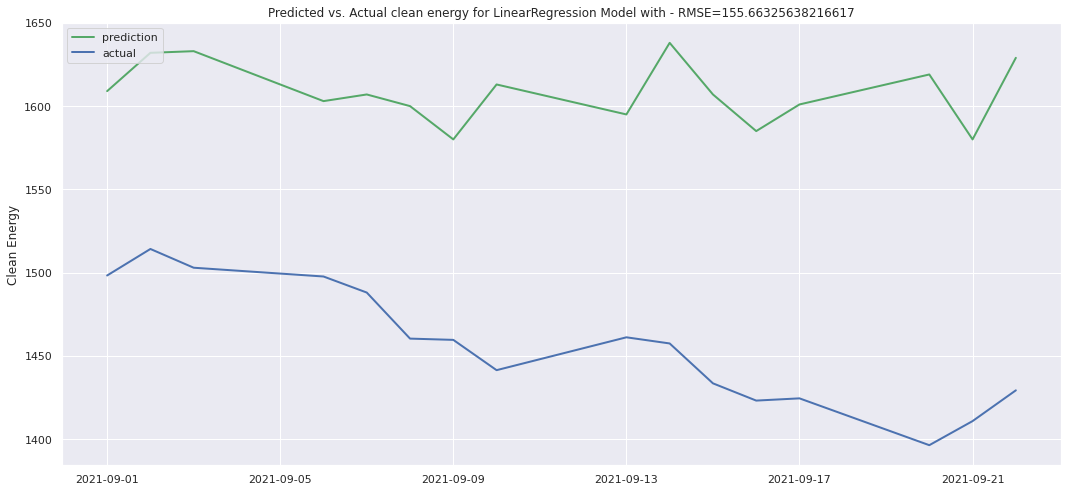

In [181]:
# visualize the predicted and actual clean energy
y_test=clean_energy_test['clean_energy'].copy()
plotResult(y_test, pred_result_test, scale=1.036, model_name='LinearRegression Model')

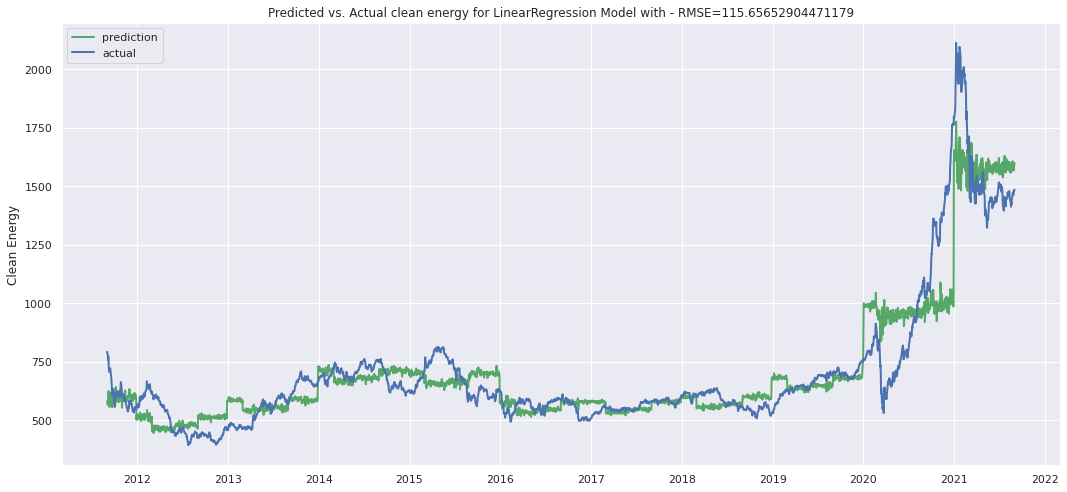

In [182]:
# visualize the predicted and actual clean energy
y_test=clean_energy_train['clean_energy'].copy()
plotResult(y_test, pred_result_train, scale=1.036, model_name='LinearRegression Model')

# Train RandomForest Model

In [227]:
# Train RandomForest Model
def train_RandomForestReg_model(train,test):
  # np.random.seed(1)
  features = train.columns.drop("clean_energy")
  # Fit model using RandomForestRegressor
  rf = RandomForestRegressor(n_estimators=200, random_state=0)  
  rf.fit(train[features], train["clean_energy"])
  pred_rf = rf.predict(test[features])
  mse_rf = mean_squared_error(test["clean_energy"], pred_rf)
  rmse_rf = np.sqrt(mse_rf)
  print('RandomForest Model Rmse ={}'.format(rmse_rf))
  return rmse_rf, pred_rf

In [228]:
# _, rf_pred_result = train_RandomForestReg_model(clean_energy_train, clean_energy_test)

In [229]:
_, rf_pred_result_train_rf= train_RandomForestReg_model(clean_energy_train, clean_energy_train)

RandomForest Model Rmse =30.47437327982814


In [230]:
_, rf_pred_result_test_rf = train_RandomForestReg_model(clean_energy_train, clean_energy_test)

RandomForest Model Rmse =46.28670052277303


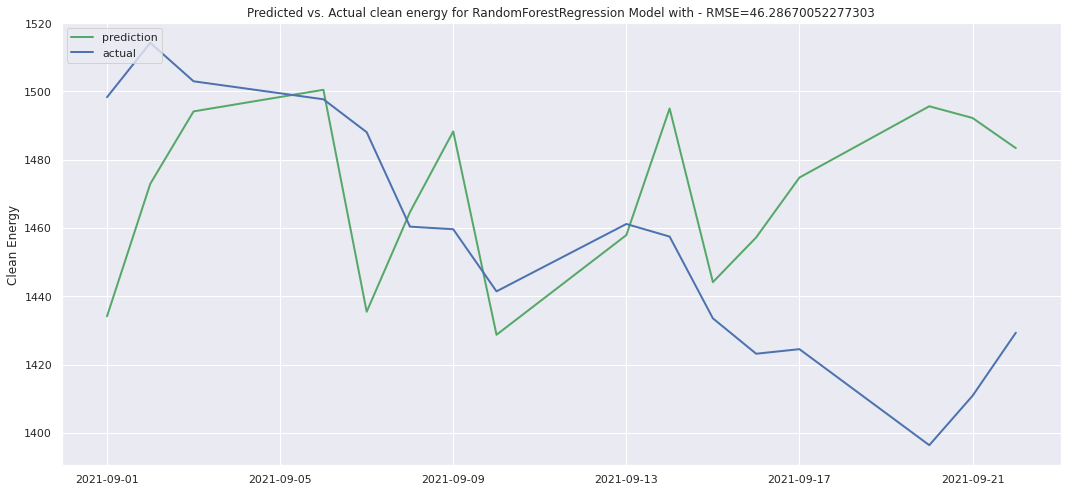

In [231]:
# visualize the predicted and actual clean energy

y_test=clean_energy_test['clean_energy'].copy()
plotResult(y_test, rf_pred_result_test_rf, scale=1.036, model_name='RandomForestRegression Model')

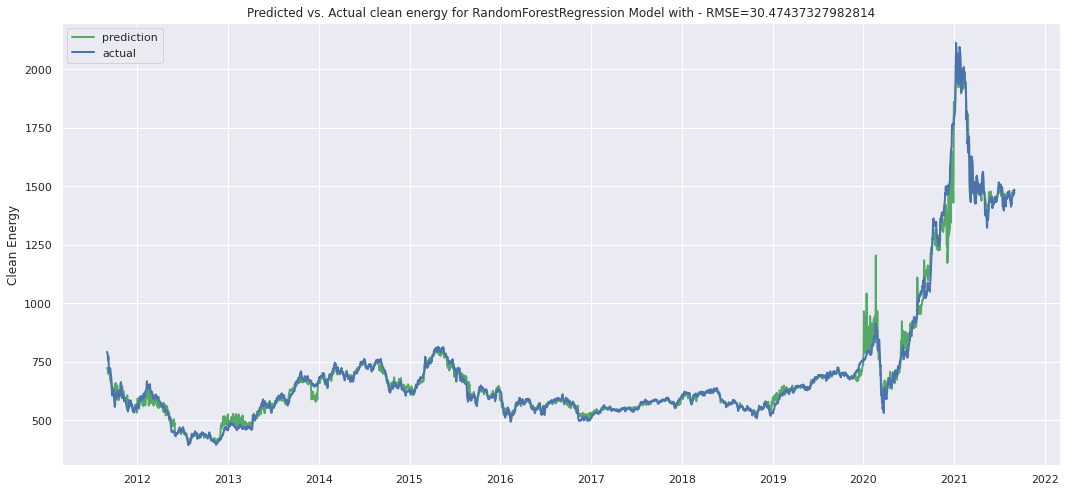

In [232]:
# # visualize the predicted and actual clean energy

y_test=clean_energy_train['clean_energy'].copy()
plotResult(y_test, rf_pred_result_train_rf, scale=1.036, model_name='RandomForestRegression Model')

# Prediction Result

- The Linear regression model performed poorly compaired to RandomForest
- Two models were able to generalize to the pandemic high peak.
- The RandomForest model can be improved with parameter tuning.
- We can also use some other regression models as a future work.


# Energy analysis Clean, Regular and oil 



In [ ]:
clean_energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Clean_Energy_Index.csv"
clean_energy_index= pd.read_csv(clean_energy_url, parse_dates=['Date'])

In [ ]:
clean_energy_index.head()

,Date,Clean_Energy
0,2011-08-31,842.65
1,2011-09-01,824.99
2,2011-09-02,791.99
3,2011-09-05,776.69
4,2011-09-06,755.55


In [ ]:
energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Energy_Index.csv"
regular_energy_index = pd.read_csv(energy_url, parse_dates=["Effective date "])

In [ ]:
regular_energy_index =  regular_energy_index.rename(columns={"Effective date ":"Date", "S&P 500 Energy (Sector)":"regular_energy"})

In [ ]:
regular_energy_index.head()

,Date,regular_energy
0,2011-08-31,506.52
1,2011-09-01,502.12
2,2011-09-02,489.40
3,2011-09-06,483.84
4,2011-09-07,501.50


In [ ]:
oil_return_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Oil_Price_Percent_Change.csv"

oil_return = pd.read_csv(oil_return_url, parse_dates=["DATE"])

In [ ]:
oil_return =  oil_return.rename(columns={"DATE":"Date","DCOILWTICO_PCH":"oil_return"})
oil_return["oil_return"] = pd.to_numeric(oil_return['oil_return'], downcast="float",errors='coerce')


In [ ]:
oil_return.head()

,Date,oil_return
0,1986-01-03,1.72144
1,1986-01-06,2.03846
2,1986-01-07,-2.56314
3,1986-01-08,0.07737
4,1986-01-09,0.61848


In [ ]:
energy_all = oil_return.merge(regular_energy_index.merge(clean_energy_index, on="Date", how="inner"), on="Date", how="inner")

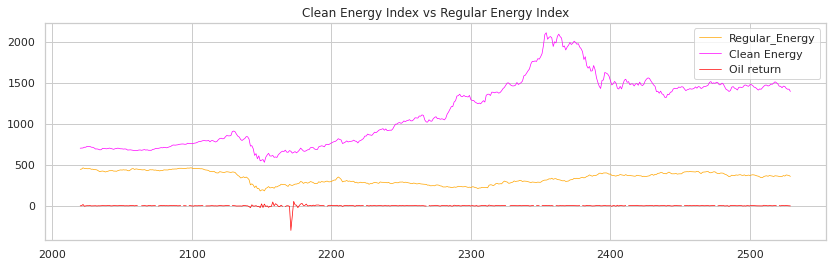

In [ ]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
energy_all.loc['2020':]["regular_energy"].plot(linewidth=0.7, color="orange",label="Regular_Energy")
energy_all.loc['2020':]["Clean_Energy"].plot(linewidth=0.7, color="magenta",label="Clean Energy")
energy_all.loc['2020':]["oil_return"].plot(linewidth=0.7, color="red",label="Oil return")
plt.title("Clean Energy Index vs Regular Energy Index")
plt.legend()